# Задание 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings(action = 'ignore')
sns.set_style('whitegrid')

In [3]:
df_1 = pd.read_csv('possum.csv')
df_1.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [8]:
df_1.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


В полях age и footlngth отсутствуют по два и одному значению соответственно. Т.к. это не большое количество по сравнению с размером выборки, то можем их удалить:

In [10]:
df_1.dropna(how = 'any', inplace = True)

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


Разделим набор данных на данные для классификации и на набор самих классов.

Во-первых, оставим числовые атрибуты с размерами:

In [33]:
df_data = df_1[['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

Во-вторых, размеры могут отличаться у особей мужского и женского пола. Поэтому атрибут Пол (sex) также необходимо оставить. Для этого преобразуем его в числовой формат:

In [35]:
df_data['sex'] = pd.factorize(df_1['sex'])[0]

In [37]:
df_data.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1


Т.к. размеры имеют различный масштаб, то необходимо провести масштабирование:

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_data)
df_scaled = pd.DataFrame(df_scaled, columns = df_data.columns)
df_scaled.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex
0,0.391091,1.114121,0.414441,-0.534944,1.389467,1.575748,0.141928,0.465334,1.238441,-0.843721
1,-0.065889,0.207174,1.013103,-0.280089,0.934052,0.758956,0.901381,0.714004,0.133146,1.185227
2,0.362530,0.984557,1.970964,0.994189,1.594404,0.932215,0.426723,1.460016,0.501578,1.185227
3,0.134040,0.045219,1.132836,0.484478,1.753799,1.006469,0.141928,0.465334,0.501578,1.185227
4,-0.351501,-0.213909,-0.423687,-0.534944,0.592490,1.253981,0.046996,0.714004,0.133146,1.185227


Закодируем значения класса популяции:

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.array(df_1['Pop']))
data_classes = le.transform(np.array(df_1['Pop']))

Сформируем тренировочную и тестовую выборки:

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data_classes, test_size = 0.2)

Построим модель LDA:

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [89]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [91]:
lda.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [93]:
result_diff = pd.DataFrame([y_test, lda.predict(X_test)]).T
result_diff

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


Результат тестовой выборки совпал с предсказанным.

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

1.0

Значение accuracy_score = 1 показывает, что модель все предсказала правильно.

Многократная стратифицированная k-блочная проверка:

In [97]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [133]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(estimator = lda, X = X_test, y = y_test, scoring = 'accuracy', cv = cv, n_jobs = -1)
print(np.mean(scores))

0.9166666666666666


# Задание 2

In [330]:
df_2 = pd.read_csv('Country-data.csv')
df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [332]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [334]:
df_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Оставим только показатели экспорта и импорта, нужные для кластеризации:

In [343]:
df_data = df_2[['exports', 'imports']]

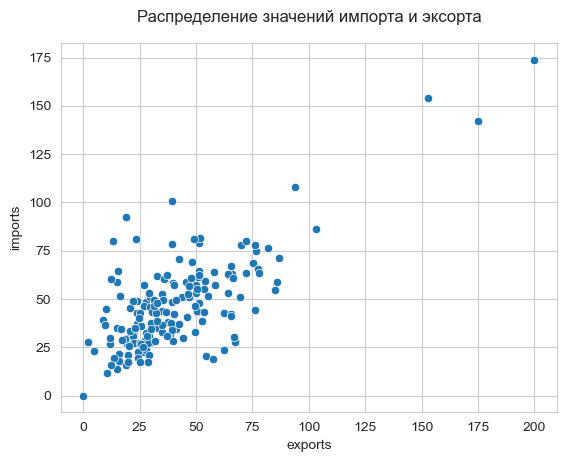

In [345]:
plt.title('Распределение значений импорта и эксорта', pad = 15)
sns.scatterplot(x = df_data['exports'], y = df_data['imports'])
plt.show()

По диаграмме распределения видно, что за значением экспорта больше 150 присутствуют выбросы.<br/>
Избавимся от них:

In [347]:
df_data = df_data[df_data['exports'] < 150]

Т.к. оба показателя имеют одинаковый масштаб, масштабирование нам не понадобится.

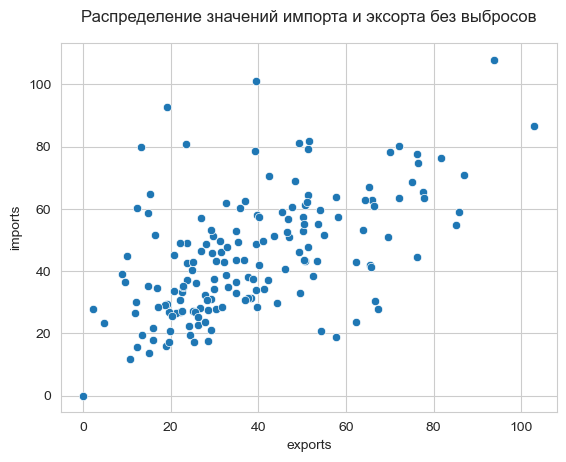

In [353]:
plt.title('Распределение значений импорта и эксорта без выбросов', pad = 15)
sns.scatterplot(x = df_data['exports'], y = df_data['imports'])
plt.show()

Проведем кластеризацию методом KMeans:

In [356]:
from sklearn.cluster import KMeans

Для примера выберем 3 кластера:

In [380]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(df_data)
clusters

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 1])

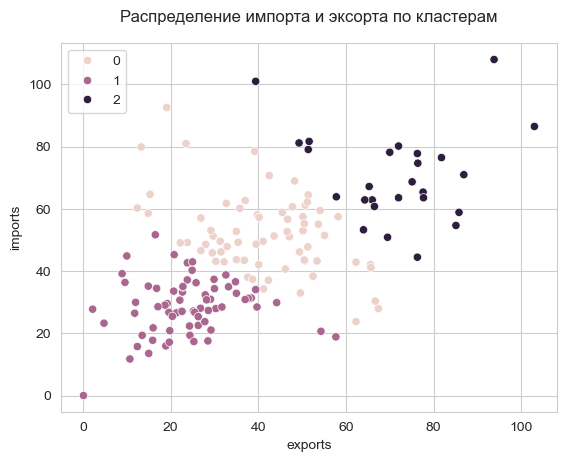

In [386]:
plt.title('Распределение импорта и эксорта по кластерам', pad = 15)
sns.scatterplot(x = df_data['exports'], y = df_data['imports'], hue = clusters)
plt.show()

Посмотрим оптимальное количество кластеров методом локтя:

In [404]:
k_inertia = []
ks = range(1, 10)

for k in ks:
    k_means = KMeans(n_clusters = k)    
    clusters_kmeans = k_means.fit_predict(df_data)
    k_inertia.append(k_means.inertia_)

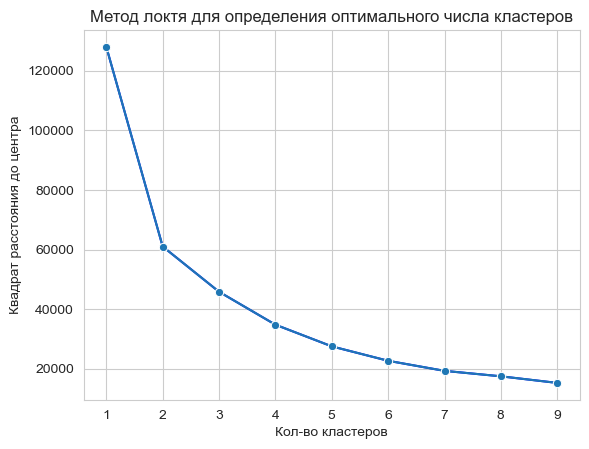

In [409]:
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Квадрат расстояния до центра')
sns.lineplot(x = ks, y = k_inertia, color = 'b')
sns.lineplot(x = ks, y = k_inertia, marker = 'o')
plt.show()

Из методо локтя видим, что наимбольший перегиб наблюдается в точке n_clusters = 2.

Применим аггломеративную кластеризацию с количеством кластеров 2:

In [412]:
from sklearn.cluster import AgglomerativeClustering

In [414]:
model = AgglomerativeClustering(n_clusters = 2)
model.fit(df_data)
pred = model.fit_predict(df_data)
pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

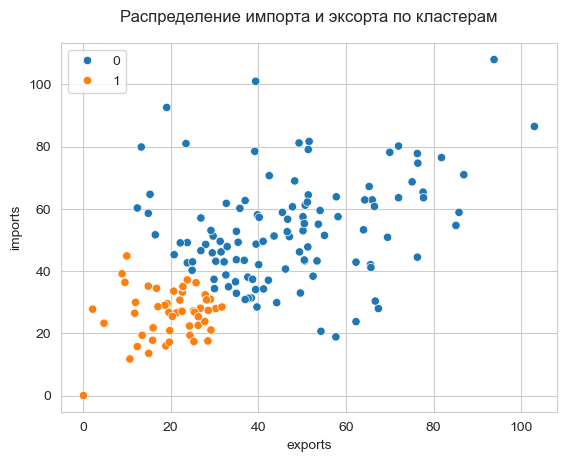

In [446]:
plt.title('Распределение импорта и эксорта по кластерам', pad = 15)
sns.scatterplot(x = df_data['exports'], y = df_data['imports'], hue = pred)
plt.show()